<a href="https://colab.research.google.com/github/potatoesAndMolasses/First-steps-on-data/blob/main/Electric_Vehicle_Population_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme
Encontrei esse dataset no site data.gov, ele se chama Electric Vehicle Population Data e sua última atualização foi no dia 14/02/2025, estamos fazendo a analise dos dados no dia 20/02/2025.

OBS: Eu tive uma limitação de ram analisando as colunas ao longo do aprendizado, por isso dividimos os dados em pedaços ao analisarmos

# Dataset

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

In [45]:
"""from google.colab import files
uploaded = files.upload()"""

'from google.colab import files\nuploaded = files.upload()'

In [46]:
# Carregar os dados

df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [47]:
# Exibir as primeiras linhas dos dados

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [48]:
# Informações em geral do dataset: os nomes das colunas, quantas linhas estão preenchidas e os tipos de dados em cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

## Limpando as colunas:

In [49]:
# Verificar a quantidade de valores ausentes por coluna
valores_ausentes = df.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

County                    4
City                      4
Postal Code               4
Electric Range           27
Base MSRP                27
Legislative District    481
Vehicle Location         11
Electric Utility          4
2020 Census Tract         4
dtype: int64


In [50]:
# Visualizar a porcentagem de valores ausentes
porcentagem_ausentes = (df.isnull().mean() * 100)
print(porcentagem_ausentes[porcentagem_ausentes > 0])

County                  0.001722
City                    0.001722
Postal Code             0.001722
Electric Range          0.011626
Base MSRP               0.011626
Legislative District    0.207122
Vehicle Location        0.004737
Electric Utility        0.001722
2020 Census Tract       0.001722
dtype: float64


In [51]:
col_falt_num = []
col_falt_obj = []

for col in df.columns:
    if df[col].isnull().sum() > 0:  # Verifica se há valores ausentes
        if df[col].dtype == 'object':  # Se a coluna for do tipo 'object'
            col_falt_obj.append(col)
        else:  # Se a coluna for do tipo numérico
            col_falt_num.append(col)

In [52]:
col_falt_obj

['County', 'City', 'Vehicle Location', 'Electric Utility']

In [53]:
col_falt_num

['Postal Code',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 '2020 Census Tract']

In [54]:
# Para colunas numéricas, preenchemos com a média ou mediana
for col in col_falt_num:
    if df[col].dtype == 'float64':  # Só consideramos float64 como numéricas
      mean_value = df[col].mean()
      df[col].fillna(mean_value, inplace=True)  # Ou você pode usar .median()


<ipython-input-54-45da8c9b790d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)  # Ou você pode usar .median()


In [55]:
# Para colunas de objetos, preenchemos com a moda
for col in col_falt_obj:
    if df[col].dtype == 'object':  # Só consideramos tipo objeto
        df[col].fillna(df[col].mode()[0], inplace=True)  # Moda, ou seja, o valor mais frequente

<ipython-input-55-06c4476d09ee>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Moda, ou seja, o valor mais frequente


In [56]:
# Verificar se ainda existem valores ausentes
print(df.isnull().sum().sum())  # Se o resultado for 0, não há mais valores ausentes


0


In [57]:
# Verificar se há valores duplicados no dataset
duplicados = df.duplicated().sum()
print(f'Número de registros duplicados no dataset: {duplicados}')

# Excluir registros duplicados, se houver
df = df.drop_duplicates()


Número de registros duplicados no dataset: 0


## EDA

In [58]:
# A ideia é agrupar o dataset em dois valores, obje para as colunas objetivas e num para as colunas numericas, vamos usar isso futuramente

col_obj = []
col_num = []

for col in df.columns:
    if df[col].dtype == 'object':
        col_obj.append(col)
    else :
        col_num.append(col)

<ipython-input-59-36ae585cc2ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


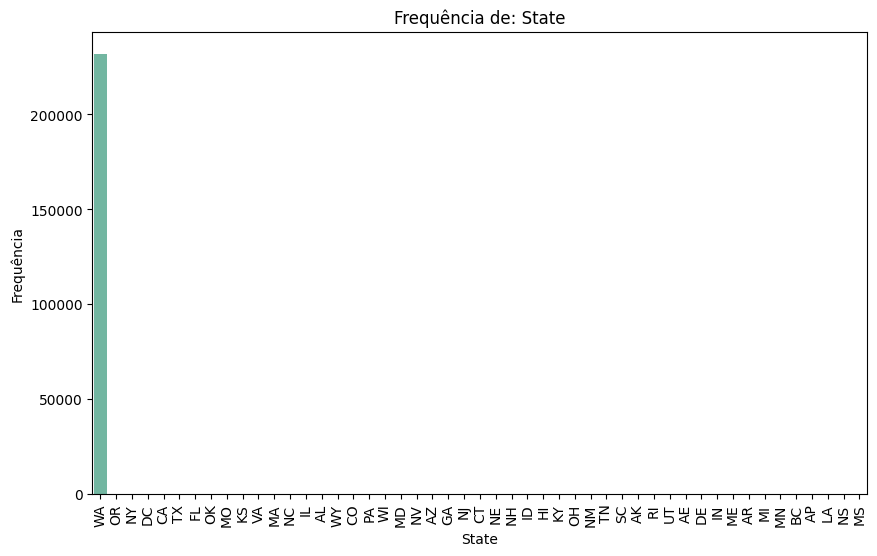

Frequência da coluna State:
   State  Frequência
0     WA      231749
1     CA         116
2     VA          62
3     MD          36
4     TX          30
5     NC          18
6     CO          18
7     FL          16
8     GA          14
9     NY          12
10    NV          12
11    NJ           9
12    CT           9
13    IL           8
14    AZ           8
15    AL           8
16    MA           8
17    OR           8
18    KS           8
19    MO           8
20    HI           7
21    SC           6
22    MI           6
23    PA           5
24    KY           5
25    RI           4
26    OH           4
27    TN           4
28    DC           4
29    NE           3
30    ID           3
31    ME           2
32    AR           2
33    UT           2
34    NM           2
35    AK           1
36    NH           1
37    AE           1
38    DE           1
39    IN           1
40    OK           1
41    WI           1
42    WY           1
43    MN           1
44    BC           1
45    

<ipython-input-59-36ae585cc2ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


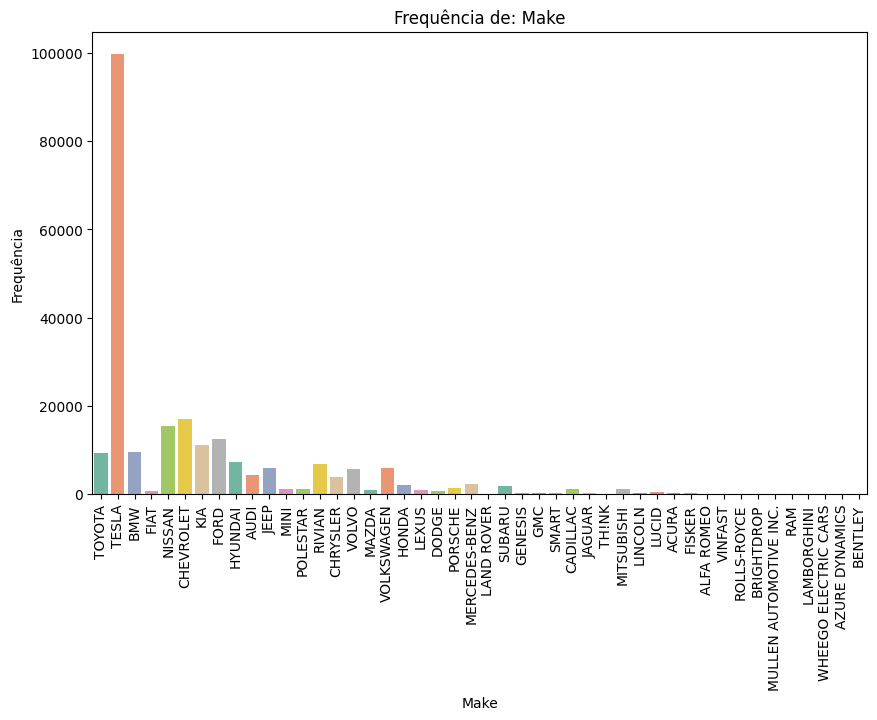

Frequência da coluna Make:
                      Make  Frequência
0                    TESLA       99692
1                CHEVROLET       16919
2                   NISSAN       15457
3                     FORD       12461
4                      KIA       11224
5                      BMW        9505
6                   TOYOTA        9265
7                  HYUNDAI        7218
8                   RIVIAN        6712
9                     JEEP        5920
10              VOLKSWAGEN        5859
11                   VOLVO        5794
12                    AUDI        4286
13                CHRYSLER        3773
14           MERCEDES-BENZ        2337
15                   HONDA        2003
16                  SUBARU        1915
17                 PORSCHE        1433
18                POLESTAR        1226
19                CADILLAC        1107
20                    MINI        1107
21              MITSUBISHI        1095
22                   MAZDA         980
23                   LEXUS         91

<ipython-input-59-36ae585cc2ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


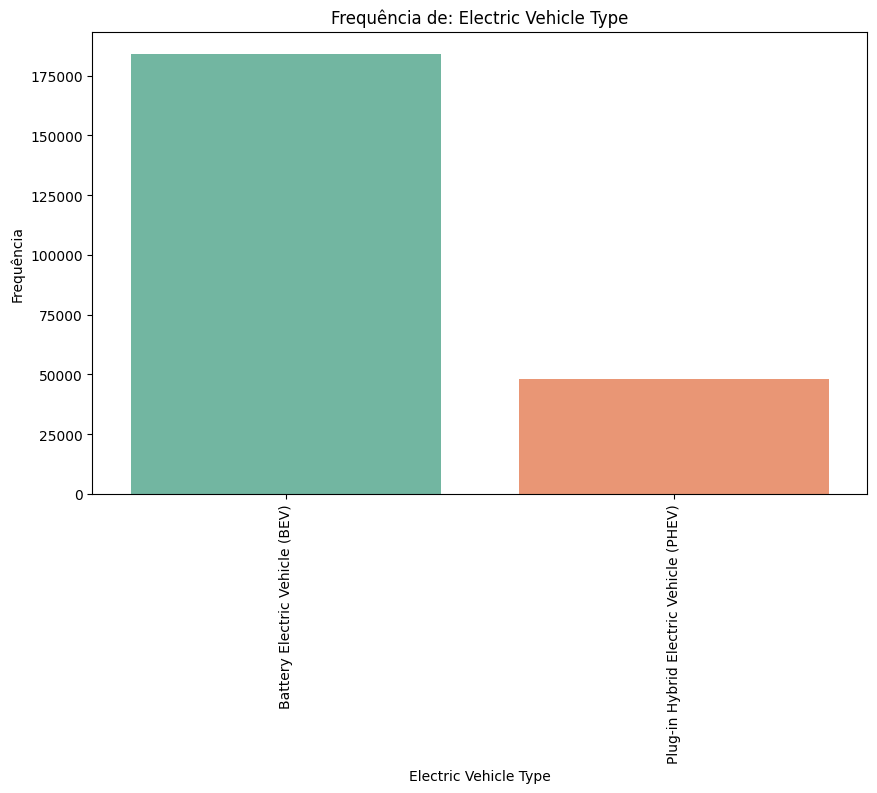

Frequência da coluna Electric Vehicle Type:
                    Electric Vehicle Type  Frequência
0          Battery Electric Vehicle (BEV)      184054
1  Plug-in Hybrid Electric Vehicle (PHEV)       48176




<ipython-input-59-36ae585cc2ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


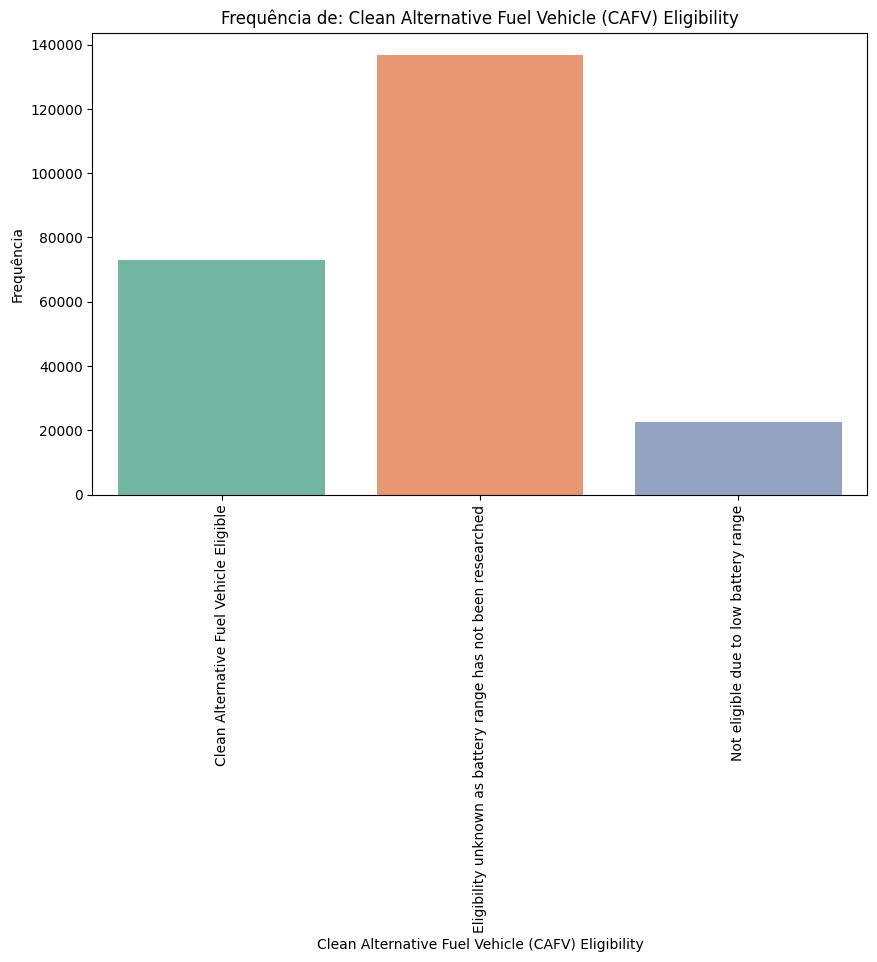

Frequência da coluna Clean Alternative Fuel Vehicle (CAFV) Eligibility:
   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Frequência
0  Eligibility unknown as battery range has not b...      136865
1            Clean Alternative Fuel Vehicle Eligible       72847
2              Not eligible due to low battery range       22518




In [59]:
col_pular = [
    'VIN (1-10)','County','City','Model','Vehicle Location','Electric Utility'
    ]
for col in col_obj:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=df, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = df[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

In [60]:
for col in col_num:
  # Conta a frequência dos valores na coluna
  qtd = df[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

Frequência da coluna Postal Code:
     Postal Code  Frequência
0        98052.0        5730
1        98012.0        4385
2        98033.0        3784
3        98006.0        3600
4        98004.0        3423
..           ...         ...
946      44145.0           1
947      89044.0           1
948      77002.0           1
949      20744.0           1
950       4412.0           1

[951 rows x 2 columns]


Frequência da coluna Model Year:
    Model Year  Frequência
0         2023       59808
1         2024       47920
2         2022       28930
3         2021       20565
4         2018       14298
5         2020       12248
6         2019       10965
7         2025        8915
8         2017        8551
9         2016        5375
10        2015        4688
11        2013        4263
12        2014        3432
13        2012        1523
14        2011         692
15        2010          23
16        2008          22
17        2000           7
18        2002           2
19        1999     

# ML

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
# Função para dividir o dataset em partes menores
def chunkify(X, y, chunk_size=50000):
    # Divide o conjunto de dados em partes menores
    for start in range(0, len(X), chunk_size):
        end = min(start + chunk_size, len(X))
        yield X[start:end], y[start:end]

In [63]:
# Carregar os dados (supondo que 'df' seja seu dataframe)
X = df.drop(columns=['Make'])  # Remover a coluna 'Make'
y = df['Make']  # A variável alvo

In [64]:
# Selecionar apenas colunas numéricas para o treinamento
numerical_cols = X.select_dtypes(include=np.number).columns
X = X[numerical_cols]

In [65]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## RandomForestClassifier

In [66]:
# Inicializar o modelo de RandomForest (no caso de memórias limitadas, mantenha um número razoável de estimadores)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
# Avaliar a acurácia
total_accuracy = 0
num_chunks = 0

# Dividir o conjunto de dados em pedaços menores e treinar
for X_chunk, y_chunk in chunkify(X_train, y_train, chunk_size=50000):
    model.fit(X_chunk, y_chunk)  # Treinamento em cada pedaço
    num_chunks += 1

# Agora, fazer as previsões no conjunto de teste

X_test = X_test[numerical_cols]
y_pred = model.predict(X_test)

# Avaliar o modelo com a precisão final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia final do modelo:", accuracy)


Acurácia final do modelo: 0.5996067117369275


## KNN

In [76]:
# Inicializando o modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

# Dividir o dataset e treinar de pedaço por pedaço
for X_chunk, y_chunk in chunkify(X_train, y_train, chunk_size=50000):
    model_knn.fit(X_chunk, y_chunk)

In [73]:
# Agora, fazer as previsões no conjunto de teste

X_test = X_test[numerical_cols]
y_pred = model_knn.predict(X_test)

# Avaliar o modelo com a precisão final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia final do modelo:", accuracy)

Acurácia final do modelo: 0.3145301353543183


## Regressão Logistica

In [78]:
# Inicializando o modelo KNN
model_rl = LogisticRegression(max_iter=50000, random_state=42)

# Dividir o dataset e treinar de pedaço por pedaço
for X_chunk, y_chunk in chunkify(X_train, y_train, chunk_size=50000):
    model_rl.fit(X_chunk, y_chunk)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [79]:
# Agora, fazer as previsões no conjunto de teste
# Certifique-se de que X_test tenha apenas as colunas numéricas usadas no treinamento
X_test = X_test[numerical_cols]
y_pred = model_rl.predict(X_test)

# Avaliar o modelo com a precisão final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia final do modelo:", accuracy)

Acurácia final do modelo: 0.4308228910993412
